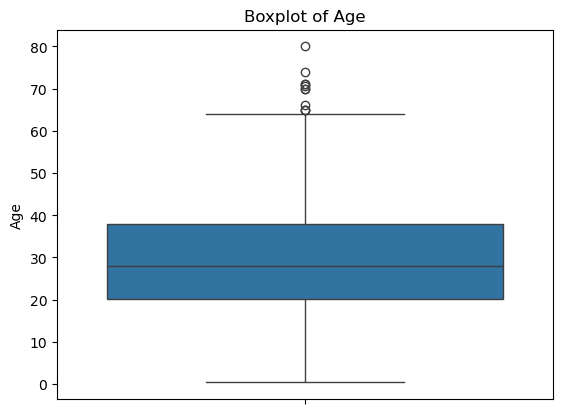

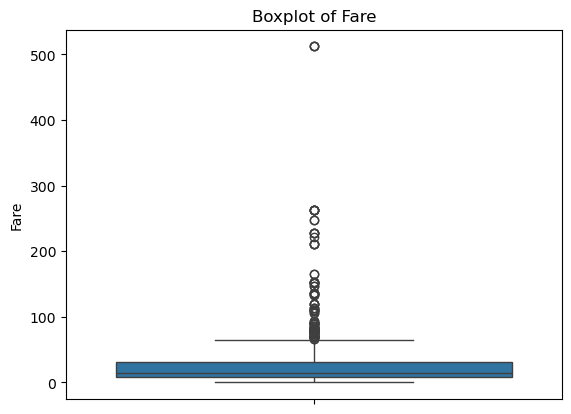

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.show()


sns.boxplot(y=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

In [2]:
def count_outliers_IQR(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers.shape[0]

age_outliers = count_outliers_IQR('Age')
fare_outliers = count_outliers_IQR('Fare')

print(f"Outliers in Age: {age_outliers}")
print(f"Outliers in Fare: {fare_outliers}")

Outliers in Age: 11
Outliers in Fare: 116


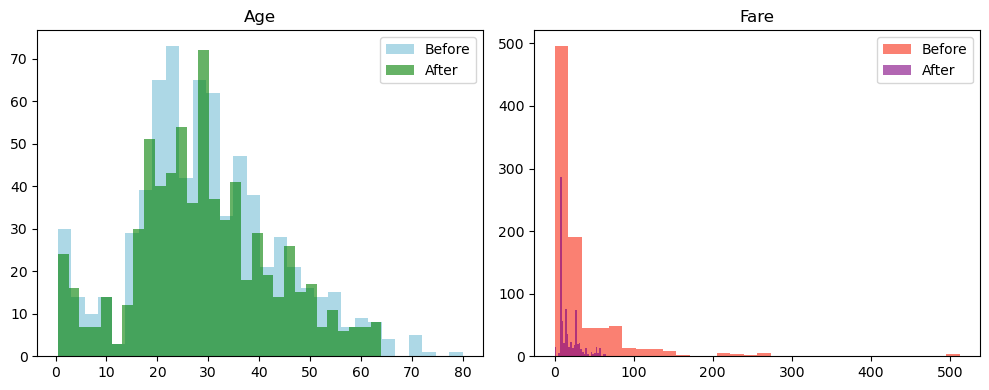

In [3]:

Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
age_clean = df[(df['Age'] >= Q1 - 1.5*IQR) & (df['Age'] <= Q3 + 1.5*IQR)]

# Remove outliers using IQR for Fare
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_clean = df[(df['Fare'] >= Q1 - 1.5*IQR) & (df['Fare'] <= Q3 + 1.5*IQR)]

# Plot histograms
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Age'].dropna(), bins=30, label='Before', color='lightblue')
plt.hist(age_clean['Age'], bins=30, label='After', color='green', alpha=0.6)
plt.title('Age')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['Fare'].dropna(), bins=30, label='Before', color='salmon')
plt.hist(fare_clean['Fare'], bins=30, label='After', color='purple', alpha=0.6)
plt.title('Fare')
plt.legend()

plt.tight_layout()
plt.show()

In [4]:

original_avg = df['Fare'].mean()

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
fare_clean = df[(df['Fare'] >= lower) & (df['Fare'] <= upper)]


clean_avg = fare_clean['Fare'].mean()


print(f"Average Fare (before removing outliers): {original_avg:.2f}")
print(f"Average Fare (after removing outliers): {clean_avg:.2f}")

Average Fare (before removing outliers): 32.20
Average Fare (after removing outliers): 17.82
